<a href="https://colab.research.google.com/github/federicovolponi/Statistical-learning-for-neural-networks/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:
#   - Taking a sample 
#   - Computing all the distances between the sample element and the elements of the training set
#   - sort the the training set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - select the top k elements in terms of distance
#   - evaluate to which class the majority of these k elements belongs to (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)

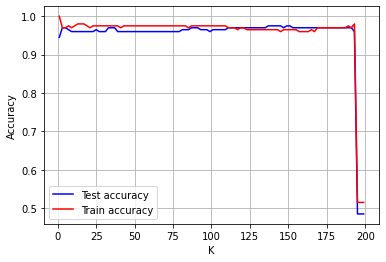

In [ ]:
from numpy.core.function_base import linspace
#Change the path to match the position of your file
#The Dataset can be loaded using thhe file option in Google Colab (the directory icon on the left)
Dataset1 = h5py.File('/content/drive/MyDrive/ColabNotebooks/Federico/Computer LAB 1/Lab1_Ex_1_Synthtetic.hdf5')
Data = np.array(Dataset1.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 
#To be completed by the student
accuracy_test = []
accuracy_train = []
prediction_test = 0
prediction_train = 0
n_features = 2
#Function for calculating euclidean distances
def euclidean_distance(p, q):
  dist = np.sqrt(np.sum(np.square(p - q)))
  return dist

#Function for K-NN Algorithm
def K_NNClassifier(sample, k):
  dist = []
  neighbors = []
  neighbors_index = []
  #Create a vector with all the distances
  for i in range(len(Train_Set)):
    dist.append(euclidean_distance(sample, Train_Set[i, :n_features]))

  neighbors_index = np.argsort(dist)
  for i in range(k):
    neighbors.append(Train_Set[neighbors_index[i],n_features]) #Vector containing the classes of the k-nearest elements
  
  classes,counts = np.unique(neighbors, return_counts=True) #Evaluate the majority class
  return classes[np.argmax(counts)]

#Calculate correct prediction for test and train sets 
for k in range(1,200,2):
  prediction_test = 0
  prediction_train = 0
  for i in range(len(Test_Set)):
    if K_NNClassifier(Test_Set[i, :n_features], k) == Test_Set[i, n_features]:
      prediction_test += 1
    if K_NNClassifier(Train_Set[i, :n_features], k) == Train_Set[i, n_features]:
      prediction_train += 1
  accuracy_test.append(prediction_test/len(Test_Set))
  accuracy_train.append(prediction_train/len(Train_Set))

k = range(1,200, 2)
fig, ax = plt.subplots()
ax.plot(k, accuracy_test, "b", label="Test accuracy")
ax.plot(k, accuracy_train, "r", label="Train accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
ax.legend()
plt.grid()
plt.show()

**Student's comments to exercise 1**

*Add comments to the results of Exercise 1 here (may use LateX for formulas if needed).*

As expected the K-NN classifier works well for low-dimensional data, infact we are working with only two dimensions.
For K near to 200 the accuracy drops beacause the classifier predicts the majority label of the whole dataset.

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

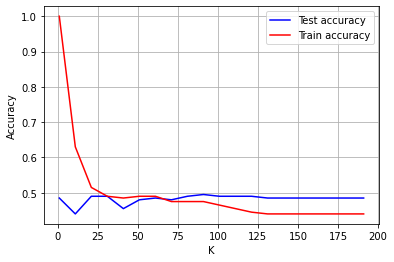

In [ ]:
#Part 1

Dataset2 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Federico/Computer LAB 1/Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student
accuracy_test = []
accuracy_train = []
prediction_test = 0
prediction_train = 0
n_features = 11
#Function for calculating euclidean distances (2 dimensions)
def euclidean_distance(p, q):
  dist = np.sqrt(np.sum(np.square(p - q)))
  return dist

#Function for K-NN Algorithm
def K_NNClassifier(sample, k):
  dist = []
  neighbors = []
  neighbors_index = []
  #Create a vector with all the distances
  for i in range(len(Train_Set)):
    dist.append(euclidean_distance(sample, Train_Set[i, :n_features]))

  neighbors_index = np.argsort(dist)
  for i in range(k):
    neighbors.append(Train_Set[neighbors_index[i],n_features]) #Vector containing the classes of the k-nearest elements
  
  classes,counts = np.unique(neighbors, return_counts=True) #Evaluate the majority class
  return classes[np.argmax(counts)]

#Calculate correct prediction for test and train sets 
for k in range(1,200,10):
  prediction_test = 0
  prediction_train = 0
  for i in range(len(Test_Set)):
    if K_NNClassifier(Test_Set[i, :n_features], k) == Test_Set[i, n_features]:
      prediction_test += 1
    if K_NNClassifier(Train_Set[i, :n_features], k) == Train_Set[i, n_features]:
      prediction_train += 1
  accuracy_test.append(prediction_test/len(Test_Set))
  accuracy_train.append(prediction_train/len(Train_Set))

k = range(1,200, 10)
fig, ax = plt.subplots()
ax.plot(k, accuracy_test, "b", label="Test accuracy")
ax.plot(k, accuracy_train, "r", label="Train accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
ax.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
#Part 2
from sklearn import linear_model
clf = linear_model.LinearRegression()

#To be completed by the student
clf.fit(Train_Set[:, :n_features], Train_Set[:, n_features])
clf.score(Train_Set[:, :n_features], Train_Set[:, n_features])

Train_predict = clf.predict(Train_Set[:, :n_features])

plt.show()
MSE_train = mean_squared_error(Train_Set[:, n_features], Train_predict)
print("MSE = ", MSE_train)

n_correct_prediction = 0
for i in range(len(Train_Set)):
  if Train_Set[i, n_features] == np.around(Train_predict[i]):
    n_correct_prediction += 1

accuracy_train = n_correct_prediction/len(Train_Set)
print("accuracy train set = ", accuracy_train)

Test_predict = clf.predict(Test_Set[:, :n_features])
MSE_test = mean_squared_error(Test_Set[:, n_features], Test_predict)
print("MSE test : ", MSE_test)
n_correct_prediction = 0
for i in range(len(Train_Set)):
  if Test_Set[i, n_features] == np.around(Test_predict[i]):
    n_correct_prediction += 1

accuracy_test = n_correct_prediction/len(Test_Set)
print("accuracy test set = ", accuracy_test)

MSE =  0.5690605158503569
accuracy train set =  0.47
MSE test :  0.6067150439571374
accuracy test set =  0.47


**Student's comments to exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

In the first part of the exercise the same code as before is used; the number of features are 11 in this case. The accuracy is significantly lower than the exercise before, around 50%, probably because we are working with higher dimensions and also with noisy data.
In the second part the prediction is evaluated using the linear regression technique. Again the accuracy, for both the train and the test set, is around 50%.

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

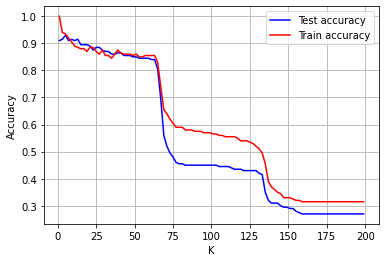

In [ ]:
Dataset3 = h5py.File('/content/drive/MyDrive/Colab Notebooks/Federico/Computer LAB 1/Lab1_Ex_3.hdf5')

Data = np.array(Dataset3.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student
accuracy_test = []
accuracy_train = []
prediction_test = 0
prediction_train = 0
n_features = 256
#Function for calculating euclidean distances (2 dimensions)
def euclidean_distance(p, q):
  dist = np.sqrt(np.sum(np.square(p - q)))
  return dist

#Function for K-NN Algorithm
def K_NNClassifier(sample, k):
  dist = []
  neighbors = []
  neighbors_index = []
  #Create a vector with all the distances
  for i in range(len(Train_Set)):
    dist.append(euclidean_distance(sample, Train_Set[i, :n_features]))

  neighbors_index = np.argsort(dist)
  for i in range(k):
    neighbors.append(Train_Set[neighbors_index[i],n_features]) #Vector containing the classes of the k-nearest elements
  
  classes,counts = np.unique(neighbors, return_counts=True) #Evaluate the majority class
  return classes[np.argmax(counts)]

#Calculate correct prediction for test and train sets 
for k in range(1,200,2):
  prediction_test = 0
  prediction_train = 0
  for i in range(len(Test_Set)):
    if K_NNClassifier(Test_Set[i, :n_features], k) == Test_Set[i, n_features]:
      prediction_test += 1
    if K_NNClassifier(Train_Set[i, :n_features], k) == Train_Set[i, n_features]:
      prediction_train += 1
  accuracy_test.append(prediction_test/len(Test_Set))
  accuracy_train.append(prediction_train/len(Train_Set))

k = range(1,200, 2)
fig, ax = plt.subplots()
ax.plot(k, accuracy_test, "b", label="Test accuracy")
ax.plot(k, accuracy_train, "r", label="Train accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
ax.legend()
plt.grid()
plt.show()

**Student's comments to exercise 3**

*Add comments to the results of Exercise 3 here (may use LateX for formulas if needed).*

Here the K-NN algorithm works pretty well until K around 65, then the accuracy drops beacause we are working with very high number of dimensions. Moreover, after K=65 the model overfits.